In [164]:
import pyns
import pandas as pd
from pathlib import Path
from IPython.display import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
%matplotlib inline

In [88]:
STIM_PATH = Path('/media/neuroscout-data/neuroscout/file_data/stimuli/')

In [141]:
dataset_tasks = {f"{dataset['name']}-{task['name']}": (dataset['id'], task['id']) for dataset in api.datasets.get(active=True) for task in dataset['tasks']}

In [234]:

dataset_tasks =  {'HealthyBrainNetwork-movieDM': (8, 7),
 'SchematicNarrative-perception': (20, 40),
 'studyforrest-movie': (11, 16),
 'Raiders-raiders': (10, 9),
 'Life-life': (9, 8),
 'ParanoiaStory-story': (18, 38),
 'Sherlock-sherlockPart1': (21, 41),
 'SherlockMerlin-MerlinMovie': (5, 4),
 'LearningTemporalStructure-movie': (19, 39)}

In [205]:
def get_stimuli_values(predictor_name, dataset_id, task_id=None):
    runs = [r['id'] for r in api.runs.get(dataset_id=dataset_id, task_id=task_id)]
    preds = api.predictors.get(name=predictor_name, run_id=runs)
    if preds:
        predictor_id = preds[0]['id']
    else:
        return None

    pes = pd.DataFrame(api.predictor_events.get(predictor_id=predictor_id, stimulus_timing=True))
    stimuli_by_value = pes.groupby('stimulus_path').max().reset_index().sort_values('value')
    
    return stimuli_by_value

In [162]:
def _load_impath(rel_path):
    return mpimg.imread(str(STIM_PATH / rel_path))

In [136]:
stimuli_by_value = get_stimuli_values('building', *datasets['Sherlock-sherlockPart1'])

In [148]:
dataset_id, task_id = datasets['Life-life']

In [206]:
def plot_top_bottom(predictor_name, dataset_id, task_id, n=2, figsize=(4., 4.)):
    sv = get_stimuli_values(predictor_name, dataset_id, task_id)
    if sv:
        bottom_ps = list(reversed(sv.iloc[(-1-n):-1]['stimulus_path'].tolist()))
        top_ps = list(reversed(sv.iloc[0:n]['stimulus_path'].tolist()))

        loaded = [_load_impath(p) for p in bottom_ps]
        loaded += [_load_impath(p) for p in top_ps]

        fig = plt.figure(figsize=figsize)
        grid = ImageGrid(fig, 111,  # similar to subplot(111)
                         nrows_ncols=(n, n),  # creates 2x2 grid of axes
                         axes_pad=0.1,  # pad between axes in inch.
                         )

        for ax, im in zip(grid, loaded):
            # Iterating over the grid returns the Axes.
            ax.imshow(im)

        plt.show()

In [237]:
def plot_top_bottom_all(predictor_name, n=4, figsize=(40., 70.)):
    n_datasets = 0
    loaded = []
    
    for dataset_id, task_id in dataset_tasks.values():
        sv = get_stimuli_values(predictor_name, dataset_id, task_id)
        if sv is None:
            continue
        n_datasets += 1
        bottom_ps = list(reversed(sv.iloc[(-1-n):-1]['stimulus_path'].tolist()))
        top_ps = list(reversed(sv.iloc[0:n]['stimulus_path'].tolist()))


        loaded += [_load_impath(p) for p in bottom_ps + top_ps]

    fig = plt.figure(figsize=figsize)
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(n_datasets, n*2),  # creates 2x2 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )

    for ax, im in zip(grid, loaded):
        # Iterating over the grid returns the Axes.
        ax.imshow(im)

    plt.show()

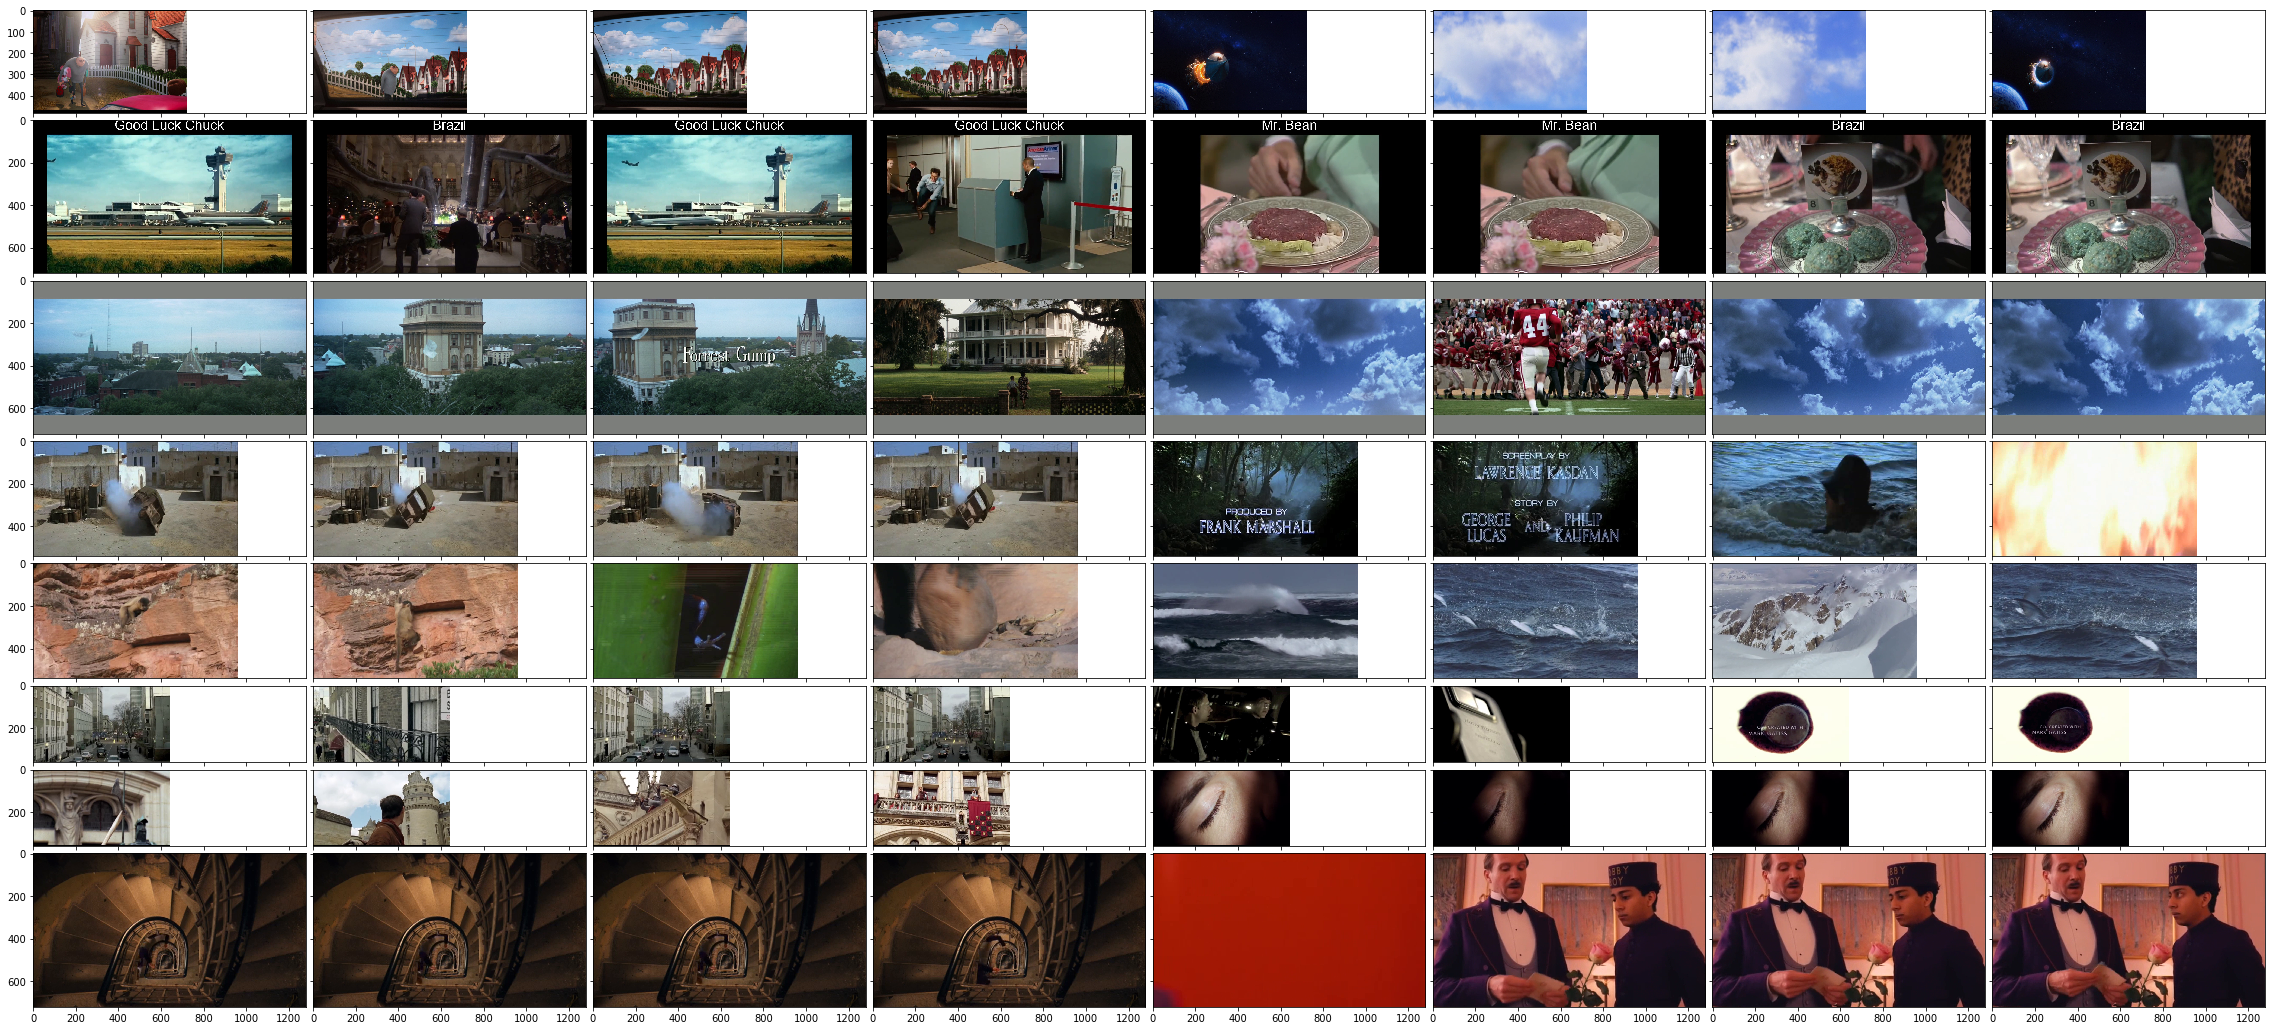

In [238]:
plot_top_bottom_all('building')